In [4]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load Data
df = pd.read_excel("data.xlsx")

In [8]:
df.head()

,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
0,2020-01-01,0.96,2.21,68.34,0.221,0.6834,65
1,2020-02-01,0.96,1.79,72.75,0.179,0.7275,65
2,2020-03-01,0.81,1.03,67.07,0.103,0.6707,65
3,2020-04-01,0.94,1.97,71.21,0.197,0.7121,65
4,2020-05-01,1.01,3.41,57.68,0.341,0.5768,65


## Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Month                                         60 non-null     datetime64[ns]
 1   Average Licensed Bed  Occupancy Rate          60 non-null     float64       
 2   Unassisted Fall Rate per 1,000 Patient Days   60 non-null     float64       
 3   Staff Responsiveness Domain Top Box Score     60 non-null     float64       
 4   Unassisted Fall %                             60 non-null     float64       
 5   Staff Responsiveness Domain Top Box Score %   60 non-null     float64       
 6   Staff Responsiveness Top Box Score Benchmark  60 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.4 KB


In [10]:
df.describe()

,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
count,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.0
mean,2022-06-16 15:12:00,0.962167,2.607833,63.087500,0.260783,0.630875,65.0
min,2020-01-01 00:00:00,0.810000,1.030000,53.310000,0.103000,0.533100,65.0
25%,2021-03-24 06:00:00,0.950000,2.310000,60.342500,0.231000,0.603425,65.0
50%,2022-06-16 00:00:00,0.960000,2.590000,63.620000,0.259000,0.636200,65.0
75%,2023-09-08 12:00:00,0.980000,3.030000,65.992500,0.303000,0.659925,65.0
max,2024-12-01 00:00:00,1.010000,3.410000,72.750000,0.341000,0.727500,65.0
std,NaN,0.028409,0.500712,4.148518,0.050071,0.041485,0.0


In [11]:
print("Date Range:",  df["Month"].dt.date.min(),"to", df["Month"].dt.date.max())

Date Range: 2020-01-01 to 2024-12-01


In [12]:
# To check whether all the "month" values are unique
df["Month"].nunique()

60

In [13]:
# Check for duplicate rows 
duplicates = df.duplicated()

# Count the number of duplicate rows 
duplicates.sum()

0

In [14]:
# Rename columns
df.columns = ['Month', 'KPI1', 'KPI2', 'KPI3', 'KPI2%', 'KPI3%', 'KPI3_Benchmark']

df.head()

,Month,KPI1,KPI2,KPI3,KPI2%,KPI3%,KPI3_Benchmark
0,2020-01-01,0.96,2.21,68.34,0.221,0.6834,65
1,2020-02-01,0.96,1.79,72.75,0.179,0.7275,65
2,2020-03-01,0.81,1.03,67.07,0.103,0.6707,65
3,2020-04-01,0.94,1.97,71.21,0.197,0.7121,65
4,2020-05-01,1.01,3.41,57.68,0.341,0.5768,65


In [15]:
df = df.drop(columns=['KPI2%', 'KPI3%', 'KPI3_Benchmark'])
df.head()

,Month,KPI1,KPI2,KPI3
0,2020-01-01,0.96,2.21,68.34
1,2020-02-01,0.96,1.79,72.75
2,2020-03-01,0.81,1.03,67.07
3,2020-04-01,0.94,1.97,71.21
4,2020-05-01,1.01,3.41,57.68


## Exploring KPI1

In [16]:
# Multiplying the values of KPI by 100 
df["KPI1"] = df["KPI1"]*100

In [17]:
# Summary of KPI1
df["KPI1"].describe()

count     60.000000
mean      96.216667
std        2.840934
min       81.000000
25%       95.000000
50%       96.000000
75%       98.000000
max      101.000000
Name: KPI1, dtype: float64

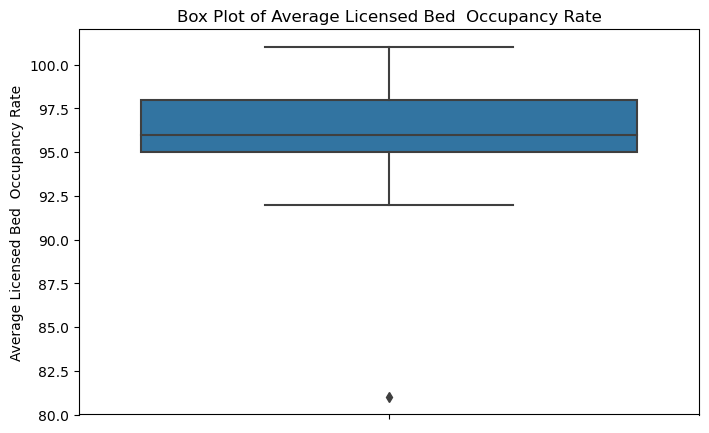

In [18]:
# Boxplot of KPI1
plt.figure(figsize=(8,5))
sns.boxplot(y=df["KPI1"])
plt.title("Box Plot of Average Licensed Bed  Occupancy Rate")
plt.ylabel("Average Licensed Bed  Occupancy Rate")
plt.show()

In [19]:
df[df["KPI1"] <  90]

,Month,KPI1,KPI2,KPI3
2,2020-03-01,81.0,1.03,67.07


## Exploring KPI2

In [20]:
# Summary of KPI2
df["KPI2"].describe()

count    60.000000
mean      2.607833
std       0.500712
min       1.030000
25%       2.310000
50%       2.590000
75%       3.030000
max       3.410000
Name: KPI2, dtype: float64

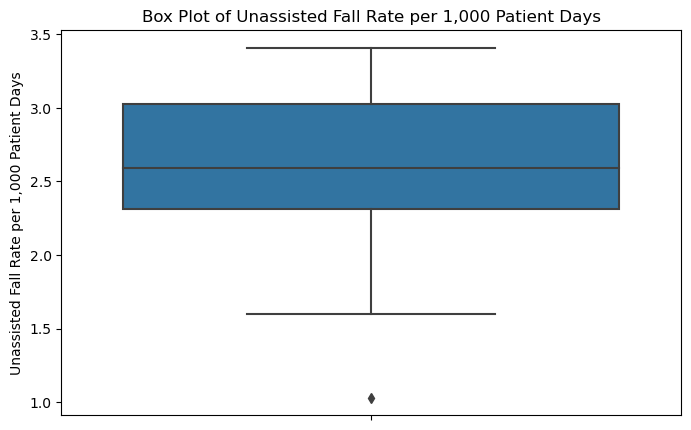

In [21]:
# Boxplot of KPI2
plt.figure(figsize=(8,5))
sns.boxplot(y=df["KPI2"])
plt.title("Box Plot of Unassisted Fall Rate per 1,000 Patient Days")
plt.ylabel("Unassisted Fall Rate per 1,000 Patient Days")
plt.show()

In [22]:
df[df["KPI2"] <  1.5]

,Month,KPI1,KPI2,KPI3
2,2020-03-01,81.0,1.03,67.07


## Exploring KPI3

In [23]:
# Summary of KPI3
df["KPI2"].describe()

count    60.000000
mean      2.607833
std       0.500712
min       1.030000
25%       2.310000
50%       2.590000
75%       3.030000
max       3.410000
Name: KPI2, dtype: float64

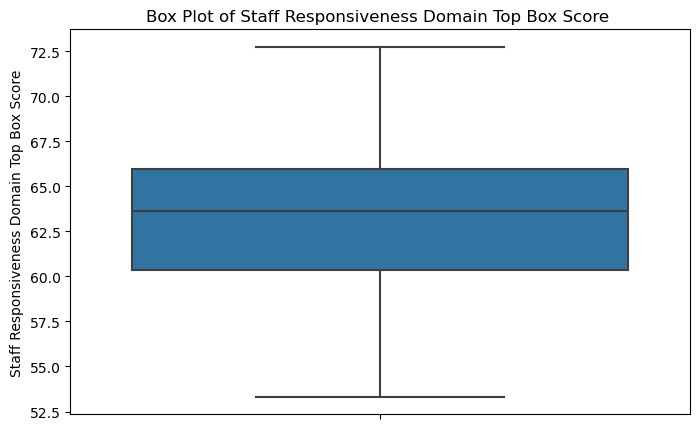

In [24]:
# Boxplot of KPI3
plt.figure(figsize=(8,5))
sns.boxplot(y=df["KPI3"])
plt.title("Box Plot of Staff Responsiveness Domain Top Box Score ")
plt.ylabel("Staff Responsiveness Domain Top Box Score")
plt.show()

# Relationship between the KPIs

<Figure size 1000x600 with 0 Axes>

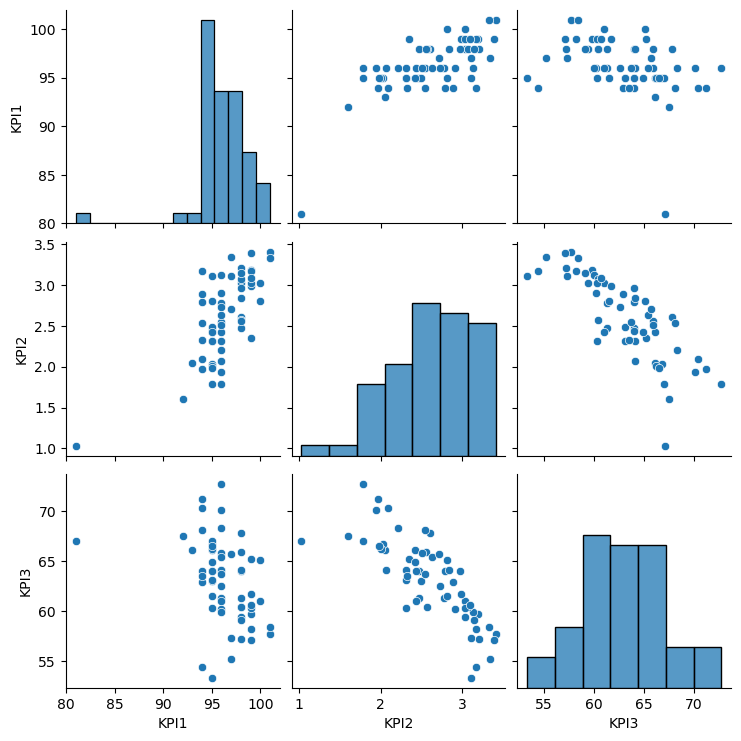

In [25]:
plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.show()

In [26]:
print(df[["KPI1", "KPI2", "KPI3"]].corr())

          KPI1      KPI2      KPI3
KPI1  1.000000  0.700112 -0.371821
KPI2  0.700112  1.000000 -0.791340
KPI3 -0.371821 -0.791340  1.000000


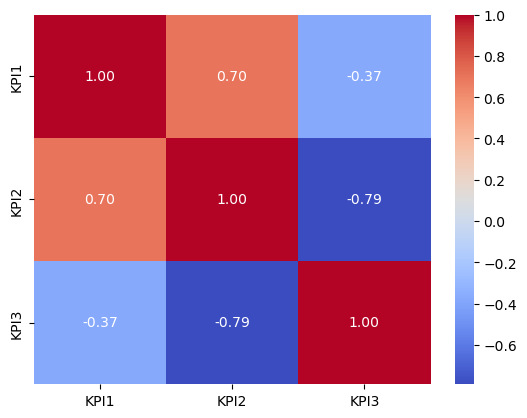

In [27]:
sns.heatmap(df[["KPI1", "KPI2", "KPI3"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.savefig("KPI_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

# Trends in KPIs over time

## KPI1

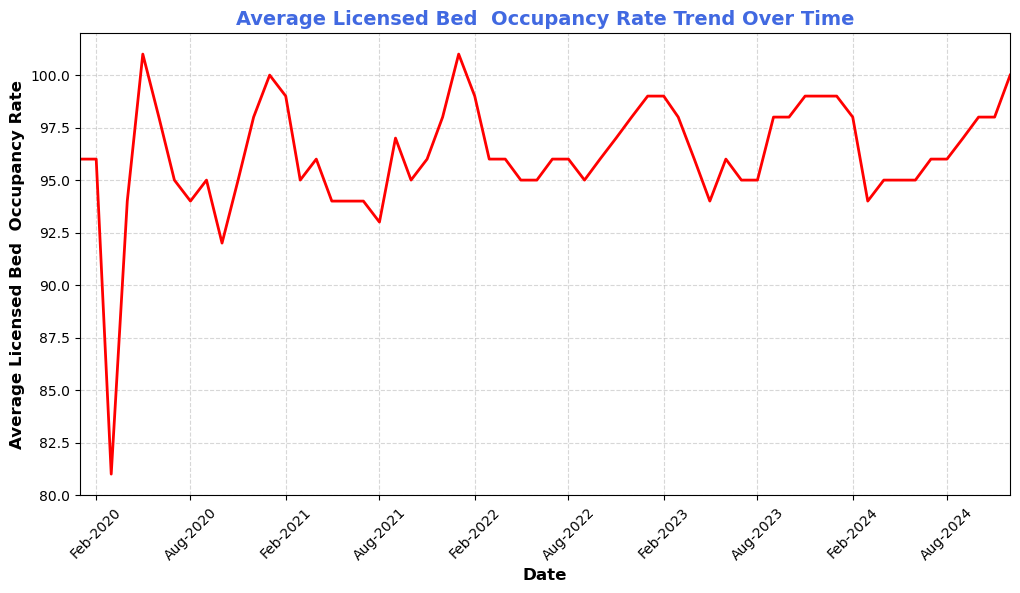

In [31]:
# KPI1 vs Time
# Set figure size
plt.figure(figsize=(12, 6))

# Line plot
sns.lineplot(data=df, x="Month", y="KPI1", color="red", linewidth=2)

# Labels & Title
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Average Licensed Bed  Occupancy Rate", fontsize=12, fontweight="bold")
plt.title("Average Licensed Bed  Occupancy Rate Trend Over Time", fontsize=14, fontweight="bold", color="royalblue")

# Format x-axis to show Month-Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # Jan-2010 format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show every 6th month

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limits to start from the first date in the dataset
plt.xlim(df["Month"].min(), df["Month"].max())

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()

In [38]:
# kpi by month

df["Month_Name"] = df["Month"].dt.month_name()

kpi1_by_month = df.groupby("Month_Name")["KPI1"].mean()

month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
kpi1_by_month = kpi1_by_month.reindex(month_order)
kpi1_by_month

Month_Name
January      99.0
February     98.2
March        92.8
April        95.4
May          95.8
June         95.6
July         95.2
August       94.8
September    96.4
October      95.8
November     97.0
December     98.6
Name: KPI1, dtype: float64

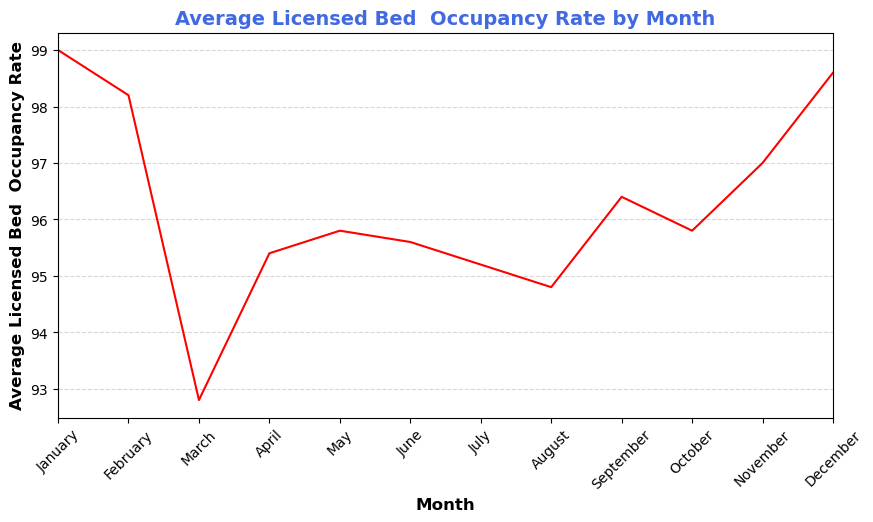

In [39]:
# Plot KPI1 by Month
plt.figure(figsize=(10, 5))
sns.lineplot(x=kpi1_by_month.index, y=kpi1_by_month.values, color="red")

# Formatting
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Average Licensed Bed  Occupancy Rate", fontsize=12, fontweight="bold")
plt.title("Average Licensed Bed  Occupancy Rate by Month", fontsize=14, fontweight="bold", color="royalblue")

# Set x-axis limits to start from the first date in the dataset
plt.xlim("January", "December")

plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [34]:
# Extract year name
df["year"] = df["Month"].dt.year

# Aggregate KPI1 by month (averaging values)
kpi1_by_year = round(df.groupby("year")["KPI1"].mean(), 3)


kpi1_by_year

year
2020    94.583
2021    95.917
2022    96.667
2023    97.167
2024    96.750
Name: KPI1, dtype: float64

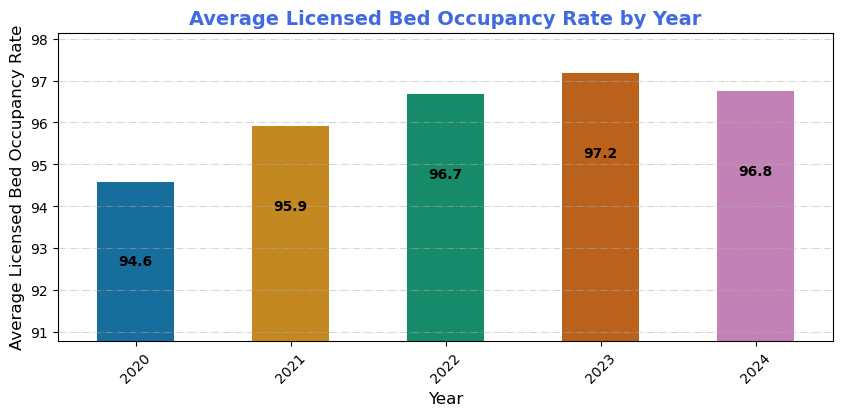

In [59]:
plt.figure(figsize=(10, 4))

# Bar plot with thinner bars
sns.barplot(x=kpi1_by_year.index, y=kpi1_by_year.values, palette="colorblind", width=0.5)  

# Adjust Y-axis limits to zoom in on variations
plt.ylim(kpi1_by_year.min() * 0.96, kpi1_by_year.max() * 1.01)

# Formatting
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Licensed Bed Occupancy Rate", fontsize=12)
plt.title("Average Licensed Bed Occupancy Rate by Year", fontsize=14, fontweight="bold", color="royalblue")

# Add values on top of bars
for i, value in enumerate(kpi1_by_year.values):
    plt.text(i, value - 2, f"{value:.1f}", ha="center", fontsize=10, fontweight="bold")

# Improve x-axis readability
plt.xticks(rotation=45)

# Add a grid for better comparison
plt.grid(axis="y", linestyle="-.", alpha=0.5)

# Save the figure
plt.savefig("KPI1_plot.png", dpi=300, bbox_inches="tight")

plt.show()

## KPI 2

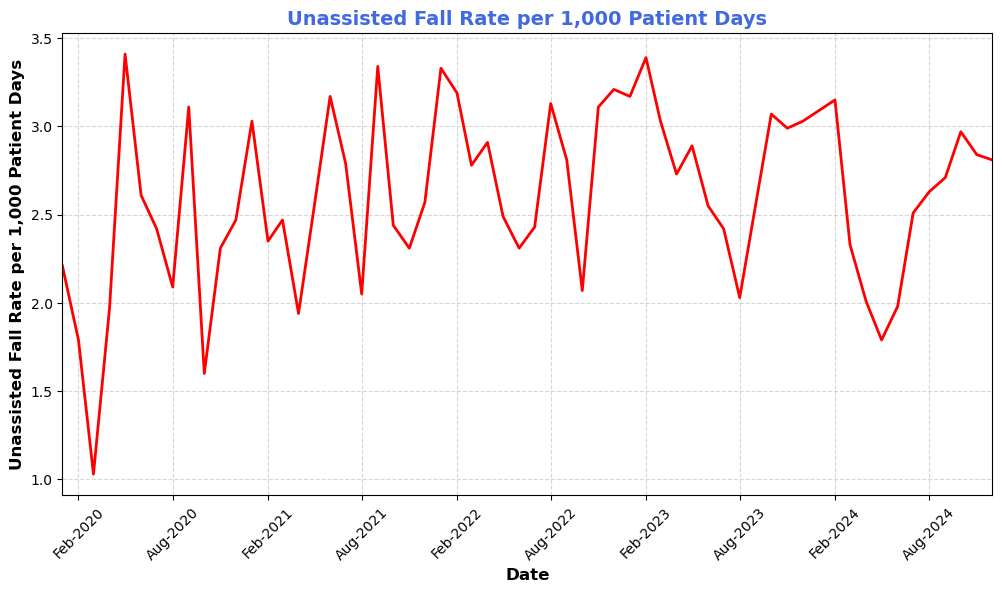

In [45]:
# KPI2 vs Time
# Set figure size
plt.figure(figsize=(12, 6))

# Line plot
sns.lineplot(data=df, x="Month", y="KPI2", color="red", linewidth=2)

# Labels & Title
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Unassisted Fall Rate per 1,000 Patient Days", fontsize=12, fontweight="bold")
plt.title("Unassisted Fall Rate per 1,000 Patient Days", fontsize=14, fontweight="bold", color="royalblue")

# Format x-axis to show Month-Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y')) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limits to start from the first date in the dataset
plt.xlim(df["Month"].min(), df["Month"].max())

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()

In [46]:

df["Month_Name"] = df["Month"].dt.month_name()

kpi2_by_month = df.groupby("Month_Name")["KPI2"].mean()


month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
kpi2_by_month = kpi2_by_month.reindex(month_order)
kpi2_by_month

Month_Name
January      2.966
February     2.774
March        2.328
April        2.312
May          2.624
June         2.524
July         2.514
August       2.386
September    2.906
October      2.430
November     2.712
December     2.818
Name: KPI2, dtype: float64

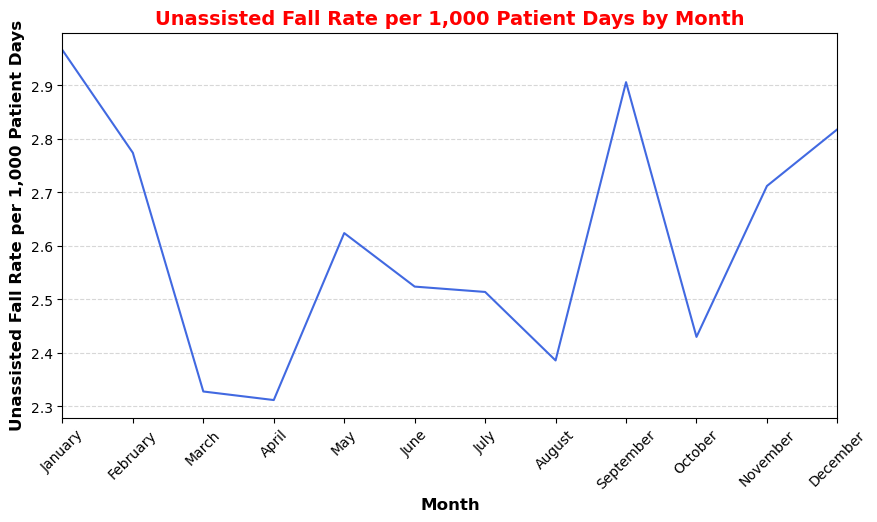

In [47]:
# Plot KPI2 by Month
plt.figure(figsize=(10, 5))
sns.lineplot(x=kpi2_by_month.index, y=kpi2_by_month.values, color="royalblue")

# Formatting
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Unassisted Fall Rate per 1,000 Patient Days", fontsize=12, fontweight="bold")
plt.title("Unassisted Fall Rate per 1,000 Patient Days by Month", fontsize=14, fontweight="bold", color="red")

# Set x-axis limits to start from the first date in the dataset
plt.xlim("January", "December")

plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [48]:
# KPI2 by year
# Extract year name
df["year"] = df["Month"].dt.year

# Aggregate KPI2 by month (averaging values)
kpi2_by_year = round(df.groupby("year")["KPI2"].mean(), 2)

# Reset index
kpi2_by_year

year
2020    2.25
2021    2.58
2022    2.81
2023    2.82
2024    2.57
Name: KPI2, dtype: float64

In [49]:
print(round(kpi2_by_year.mean(),2))

2.61


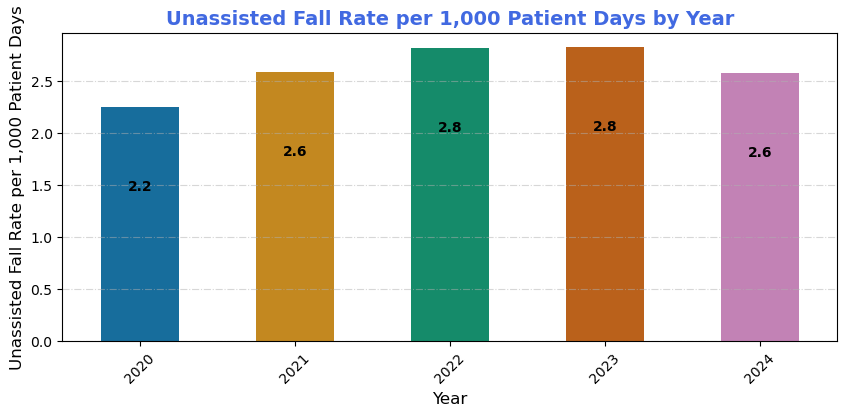

In [58]:
plt.figure(figsize=(10, 4))

# Bar plot with thinner bars
sns.barplot(x=kpi2_by_year.index, y=kpi2_by_year.values, palette="colorblind", width=0.5)  


# Formatting
plt.xlabel("Year", fontsize=12)
plt.ylabel("Unassisted Fall Rate per 1,000 Patient Days", fontsize=12)
plt.title("Unassisted Fall Rate per 1,000 Patient Days by Year", fontsize=14, fontweight="bold", color="royalblue")

# Add values on top of bars
for i, value in enumerate(kpi2_by_year.values):
    plt.text(i, value - 0.8, f"{value:.1f}", ha="center", fontsize=10, fontweight="bold")

# Improve x-axis readability
plt.xticks(rotation=45)

# Add a grid for better comparison
plt.grid(axis="y", linestyle="-.", alpha=0.5)

# Save the figure
plt.savefig("KPI2_plot.png", dpi=300, bbox_inches="tight")

plt.show()

## KPI3

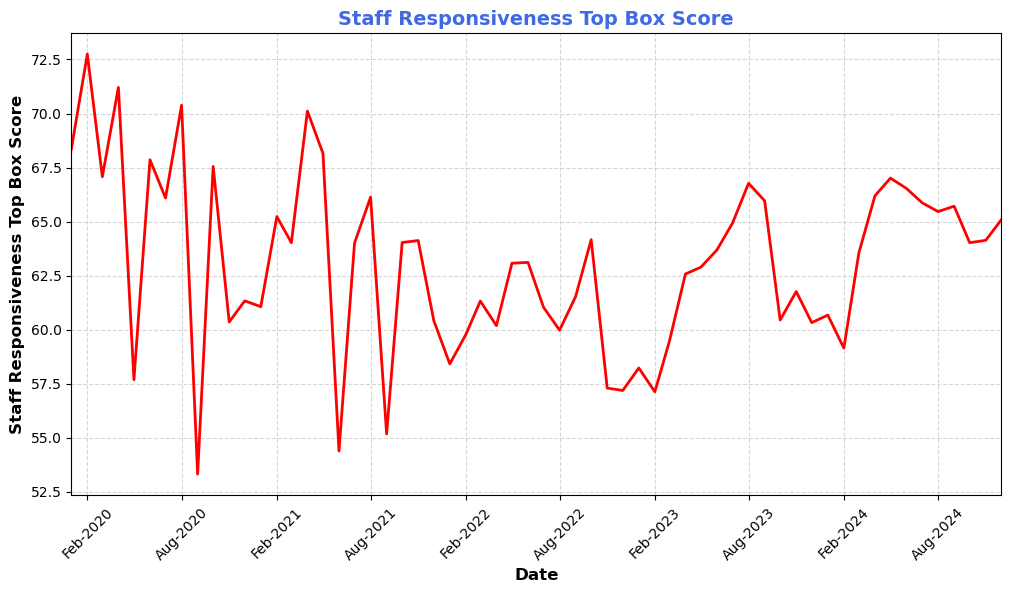

In [61]:
# KPI3 vs Time
# Set figure size
plt.figure(figsize=(12, 6))

# Line plot
sns.lineplot(data=df, x="Month", y="KPI3", color="red", linewidth=2)

# Labels & Title
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Staff Responsiveness Top Box Score", fontsize=12, fontweight="bold")
plt.title("Staff Responsiveness Top Box Score", fontsize=14, fontweight="bold", color="royalblue")

# Format x-axis to show Month-Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y')) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limits to start from the first date in the dataset
plt.xlim(df["Month"].min(), df["Month"].max())

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()

In [62]:
# KPI3 by month
# Extract month name
df["Month_Name"] = df["Month"].dt.month_name()

# Aggregate KPI3 by month (averaging values)
kpi3_by_month = df.groupby("Month_Name")["KPI3"].mean()

# Sort months in order (Jan–Dec)
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
kpi3_by_month = kpi3_by_month.reindex(month_order)
kpi3_by_month

Month_Name
January      61.340
February     62.802
March        63.082
April        66.052
May          63.762
June         63.114
July         64.384
August       65.742
September    60.336
October      64.040
November     61.530
December     60.866
Name: KPI3, dtype: float64

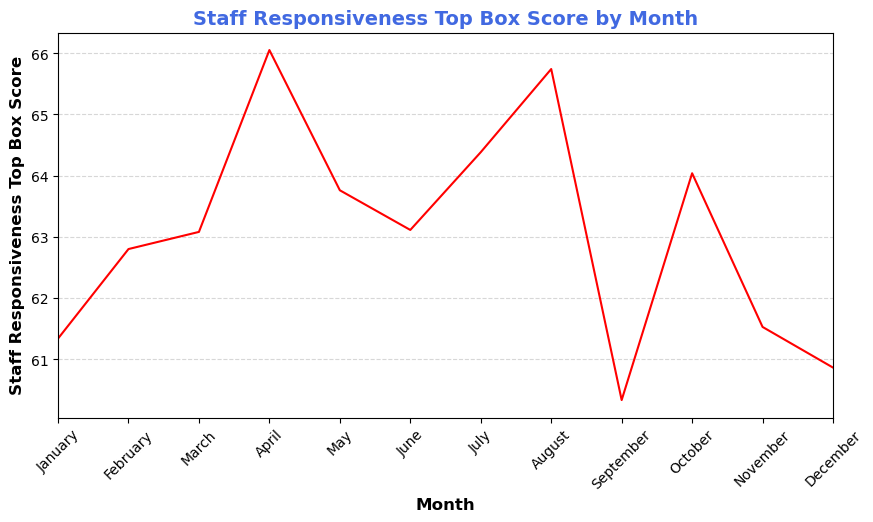

In [63]:
# Plot KPI3 by Month
plt.figure(figsize=(10, 5))
sns.lineplot(x=kpi3_by_month.index, y=kpi3_by_month.values, color="red")

# Formatting
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Staff Responsiveness Top Box Score", fontsize=12, fontweight="bold")
plt.title("Staff Responsiveness Top Box Score by Month", fontsize=14, fontweight="bold", color="royalblue")

# Set x-axis limits to start from the first date in the dataset
plt.xlim("January", "December")

plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [64]:
# KPI3 by year
# Extract year name
df["year"] = df["Month"].dt.year

# Aggregate KPI3 by month (averaging values)
kpi3_by_year = round(df.groupby("year")["KPI3"].mean(), 2)

# Reset index
kpi3_by_year

year
2020    65.33
2021    63.07
2022    60.58
2023    62.01
2024    64.45
Name: KPI3, dtype: float64

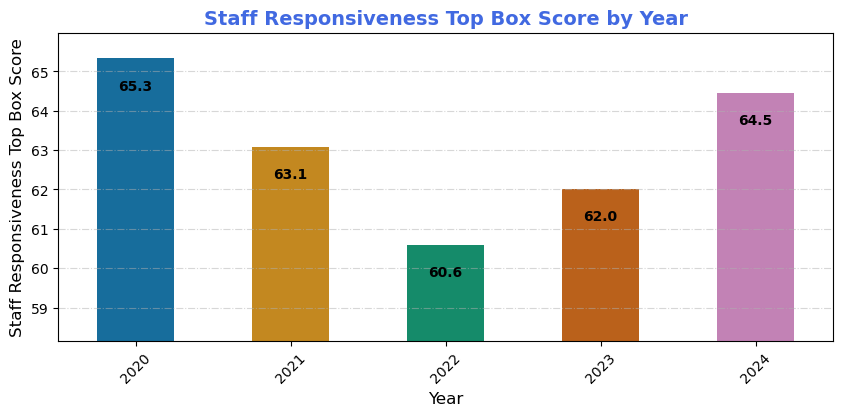

In [66]:
plt.figure(figsize=(10, 4))

# Bar plot with thinner bars
sns.barplot(x=kpi3_by_year.index, y=kpi3_by_year.values, palette="colorblind", width=0.5)  

# Adjust Y-axis limits to zoom in on variations
plt.ylim(kpi3_by_year.min() * 0.96, kpi3_by_year.max() * 1.01)

# Formatting
plt.xlabel("Year", fontsize=12)
plt.ylabel("Staff Responsiveness Top Box Score", fontsize=12)
plt.title("Staff Responsiveness Top Box Score by Year", fontsize=14, fontweight="bold", color="royalblue")

# Add values on top of bars
for i, value in enumerate(kpi3_by_year.values):
    plt.text(i, value - 0.8, f"{value:.1f}", ha="center", fontsize=10, fontweight="bold")

# Improve x-axis readability
plt.xticks(rotation=45)

# Add a grid for better comparison
plt.grid(axis="y", linestyle="-.", alpha=0.5)

# Save the figure
plt.savefig("KPI3_plot.png", dpi=300, bbox_inches="tight")

plt.show()

## Exporting the final dataset

In [67]:
df.to_csv('data.csv', index=False)